# Modelo de Lorenz

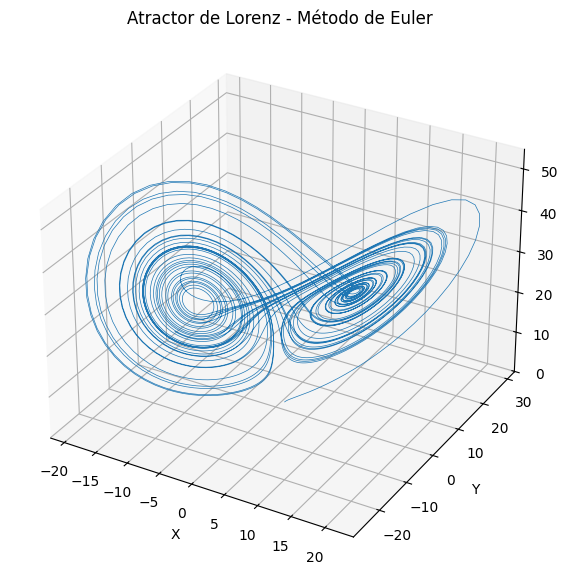

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parâmetros do modelo de Lorenz
sigma = 10
beta = 8/3
rho = 28
dt = 0.01  # Passo de tempo
num_steps = 5000  # Número de passos de tempo

# Condições iniciais (semente)
x0, y0, z0 = 1.0, 1.0, 1.0

# Inicializa arrays para armazenar a trajetória
x = np.zeros(num_steps)
y = np.zeros(num_steps)
z = np.zeros(num_steps)
x[0], y[0], z[0] = x0, y0, z0

# Método de Euler para resolver as equações diferenciais
for i in range(num_steps - 1):
    dx = sigma * (y[i] - x[i])
    dy = x[i] * (rho - z[i]) - y[i]
    dz = x[i] * y[i] - beta * z[i]

    x[i + 1] = x[i] + dx * dt
    y[i + 1] = y[i] + dy * dt
    z[i + 1] = z[i] + dz * dt

# Plotando a trajetória no espaço tridimensional
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Atractor de Lorenz - Método de Euler")
plt.show()


# Comparação regular X caos

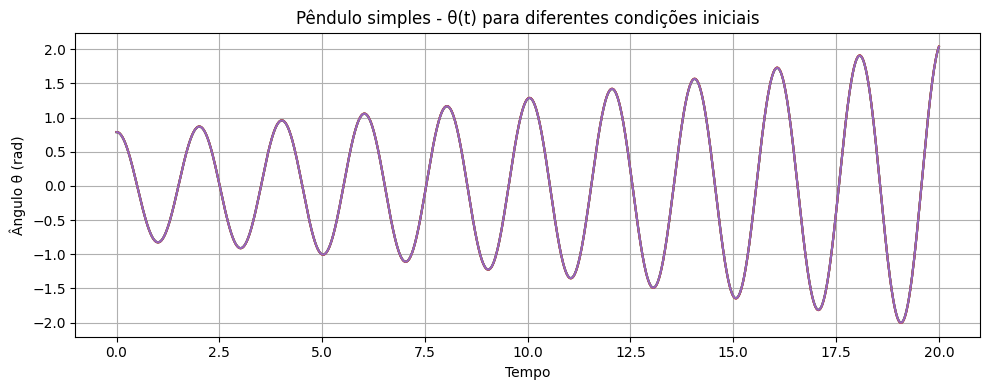

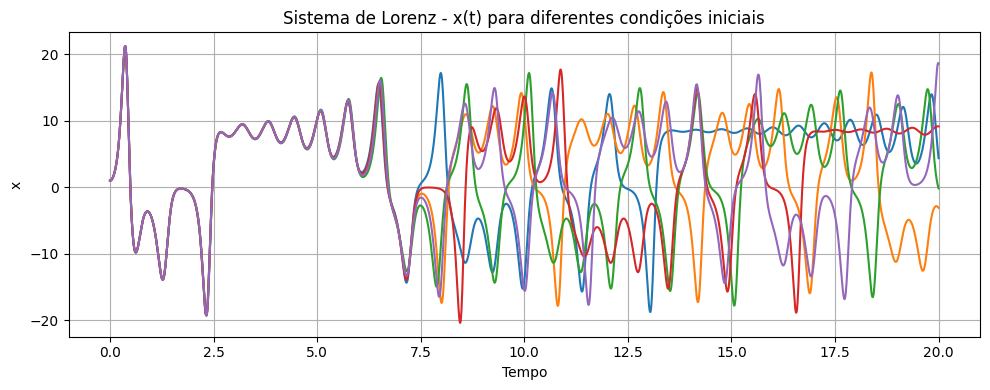

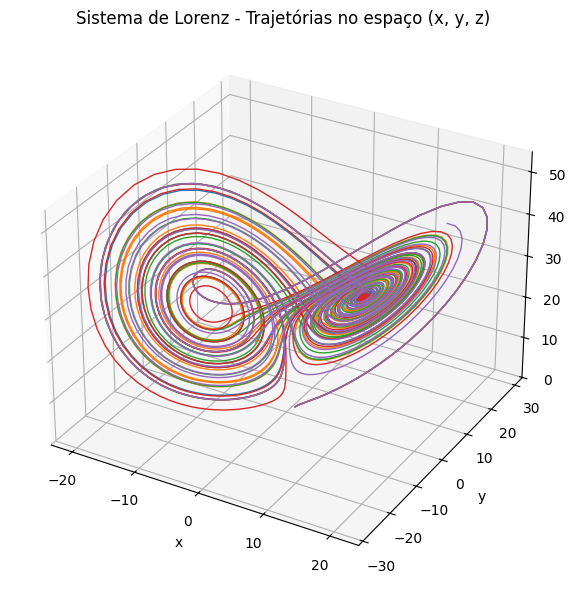

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ------------------------
# Sistema 1: Pêndulo simples
# ------------------------
def pendulo_euler(theta0, omega0, dt, T, g=9.81, l=1.0):
    n = int(T / dt)
    theta = np.zeros(n)
    omega = np.zeros(n)
    theta[0] = theta0
    omega[0] = omega0
    for i in range(n - 1):
        omega[i+1] = omega[i] - (g / l) * theta[i] * dt
        theta[i+1] = theta[i] + omega[i] * dt
    return theta, omega

# ------------------------
# Sistema 2: Modelo de Lorenz
# ------------------------
def lorenz_euler(x0, y0, z0, dt, T, sigma=10, rho=28, beta=8/3):
    n = int(T / dt)
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    x[0], y[0], z[0] = x0, y0, z0
    for i in range(n - 1):
        dx = sigma * (y[i] - x[i])
        dy = x[i] * (rho - z[i]) - y[i]
        dz = x[i] * y[i] - beta * z[i]
        x[i+1] = x[i] + dx * dt
        y[i+1] = y[i] + dy * dt
        z[i+1] = z[i] + dz * dt
    return x, y, z

# ------------------------
# Parâmetros de simulação
# ------------------------
dt = 0.01
T = 20
t = np.linspace(0, T, int(T/dt))
num_sim = 5
noise_std = 1e-3  # ruído gaussiano pequeno

# ------------------------
# Simulações do pêndulo
# ------------------------
theta_all = []
for seed in range(num_sim):
    np.random.seed(seed)
    delta = np.random.normal(0, noise_std)
    theta, omega = pendulo_euler(np.pi/4 + delta, 0, dt, T)
    theta_all.append(theta)

# ------------------------
# Simulações do modelo de Lorenz
# ------------------------
lorenz_all = []
for seed in range(num_sim):
    np.random.seed(seed)
    delta = np.random.normal(0, noise_std, size=3)
    x, y, z = lorenz_euler(1 + delta[0], 1 + delta[1], 1 + delta[2], dt, T)
    lorenz_all.append((x, y, z))

# ------------------------
# Visualização: Pêndulo
# ------------------------
plt.figure(figsize=(10, 4))
for theta in theta_all:
    plt.plot(t, theta)
plt.title("Pêndulo simples - θ(t) para diferentes condições iniciais")
plt.xlabel("Tempo")
plt.ylabel("Ângulo θ (rad)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------
# Visualização: Lorenz (x vs t)
# ------------------------
plt.figure(figsize=(10, 4))
for x, _, _ in lorenz_all:
    plt.plot(t, x)
plt.title("Sistema de Lorenz - x(t) para diferentes condições iniciais")
plt.xlabel("Tempo")
plt.ylabel("x")
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------
# Visualização: Lorenz em 3D
# ------------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for x, y, z in lorenz_all:
    ax.plot(x, y, z, lw=1)
ax.set_title("Sistema de Lorenz - Trajetórias no espaço (x, y, z)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.tight_layout()
plt.show()
